# Parkinson’s Disease

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Colors
from termcolor import colored
from imblearn.over_sampling import SMOTE
# scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

## Load the data

In [2]:
# Load the data from a .csv
df = pd.read_csv('/content/parkinsons.data')

In [3]:
# Exploring the data frame
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Exploring and preparing  the data

In [4]:
# Checking the size and the columns of the data frame
print(df.shape,'\n')
df.columns.values

(195, 24) 



array(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype=object)

### Improving the columns

In [5]:
# First, we make a copy of the raw data to prevent alterations
data_copy = df.copy()

In [6]:
# Here, we are changing the position of the column 'status' to end of the our new data frame
cols = ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']

In [7]:
data = data_copy[cols]
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [8]:
# Now, we simplified the name of the columns

# converting column names into lower case
data.columns = [c.lower() for c in data.columns]
# replacing spaces in column names with '_'
data.columns = [c.replace(' ', '_') for c in data.columns]
# replacing ':' in column names with '_'
data.columns = [c.replace(':', '_') for c in data.columns]
# replacing '(' in column names with '_'
data.columns = [c.replace('(', '_') for c in data.columns]
# replacing ')' in column names with '' i.e blank
data.columns = [c.replace(')', '') for c in data.columns]
# replacing '%' in column names with 'in_percent'
data.columns = [c.replace('%', 'in_percent') for c in data.columns]

# Checking the result
data.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [10]:
# Looking the descriptive statistics of the data
data.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


## Preprocessing and Visualization

In [11]:
# We transform the column 'spread1' so that all the data are positive numbers
data['spread1'] = data['spread1'].abs()

In [12]:
# As we saw in previously, 'data_0.info()' implies that we do not have missing values, however,
# we verify this with the following command:
# This will give us the total number of missing values feature-wise
data.isnull().sum()

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

In [13]:
# Now, we are checking for the existence of duplicate values
data.duplicated().sum()

0

In [14]:
# Computing the mean, skewness and kurtosis, to determine the distribution of the variables
data_comparison = pd.DataFrame(data.mean(numeric_only=True), columns=['Mean'])
data_comparison['Skewess'] = data.skew(numeric_only=True)
data_comparison['Kurtosis'] = data.kurt(numeric_only=True)
data_comparison.style\
    .background_gradient(cmap="Greys", subset=['Skewess'])\
    .background_gradient(cmap="Reds", subset=['Kurtosis'])

,Mean,Skewess,Kurtosis
mdvp_fo_hz,154.228641,0.591737,-0.627898
mdvp_fhi_hz,197.104918,2.542146,7.627241
mdvp_flo_hz,116.324631,1.217350,0.654615
mdvp_jitter_in_percent,0.006220,3.084946,12.030939
mdvp_jitter_abs,0.000044,2.649071,10.869043
mdvp_rap,0.003306,3.360708,14.213798
mdvp_ppq,0.003446,3.073892,11.963922
jitter_ddp,0.009920,3.362058,14.224762
mdvp_shimmer,0.029709,1.666480,3.238308
mdvp_shimmer_db,0.282251,1.999389,5.128193


The table above allows us to observe the skewness and kurtosis of our variables.

- Remember that a bias close to zero implies that the distribution conforms to normal. When the value is significantly positive, it indicates that the distribution is skewed to the right; While a significantly negative value indicates that the distribution is skewed to the left.

- On the other hand, a significantly positive kurtosis suggests that the distribution has a steeper peak and heavier tails, while a significantly negative kurtosis indicates a flatter peak and lighter tails.

*We will verify the values obtained with respect to skewness and kurtosis by displaying the probability distribution function (PDF) of each variable*

In [15]:
# We get an array with all columns except the column 'name' and 'status'
column_names = data.select_dtypes(exclude=['object', 'int64']).columns

# Just to save some plots
#column_names = ['mdvp_fo_hz', 'mdvp_fhi_hz', 'mdvp_flo_hz']

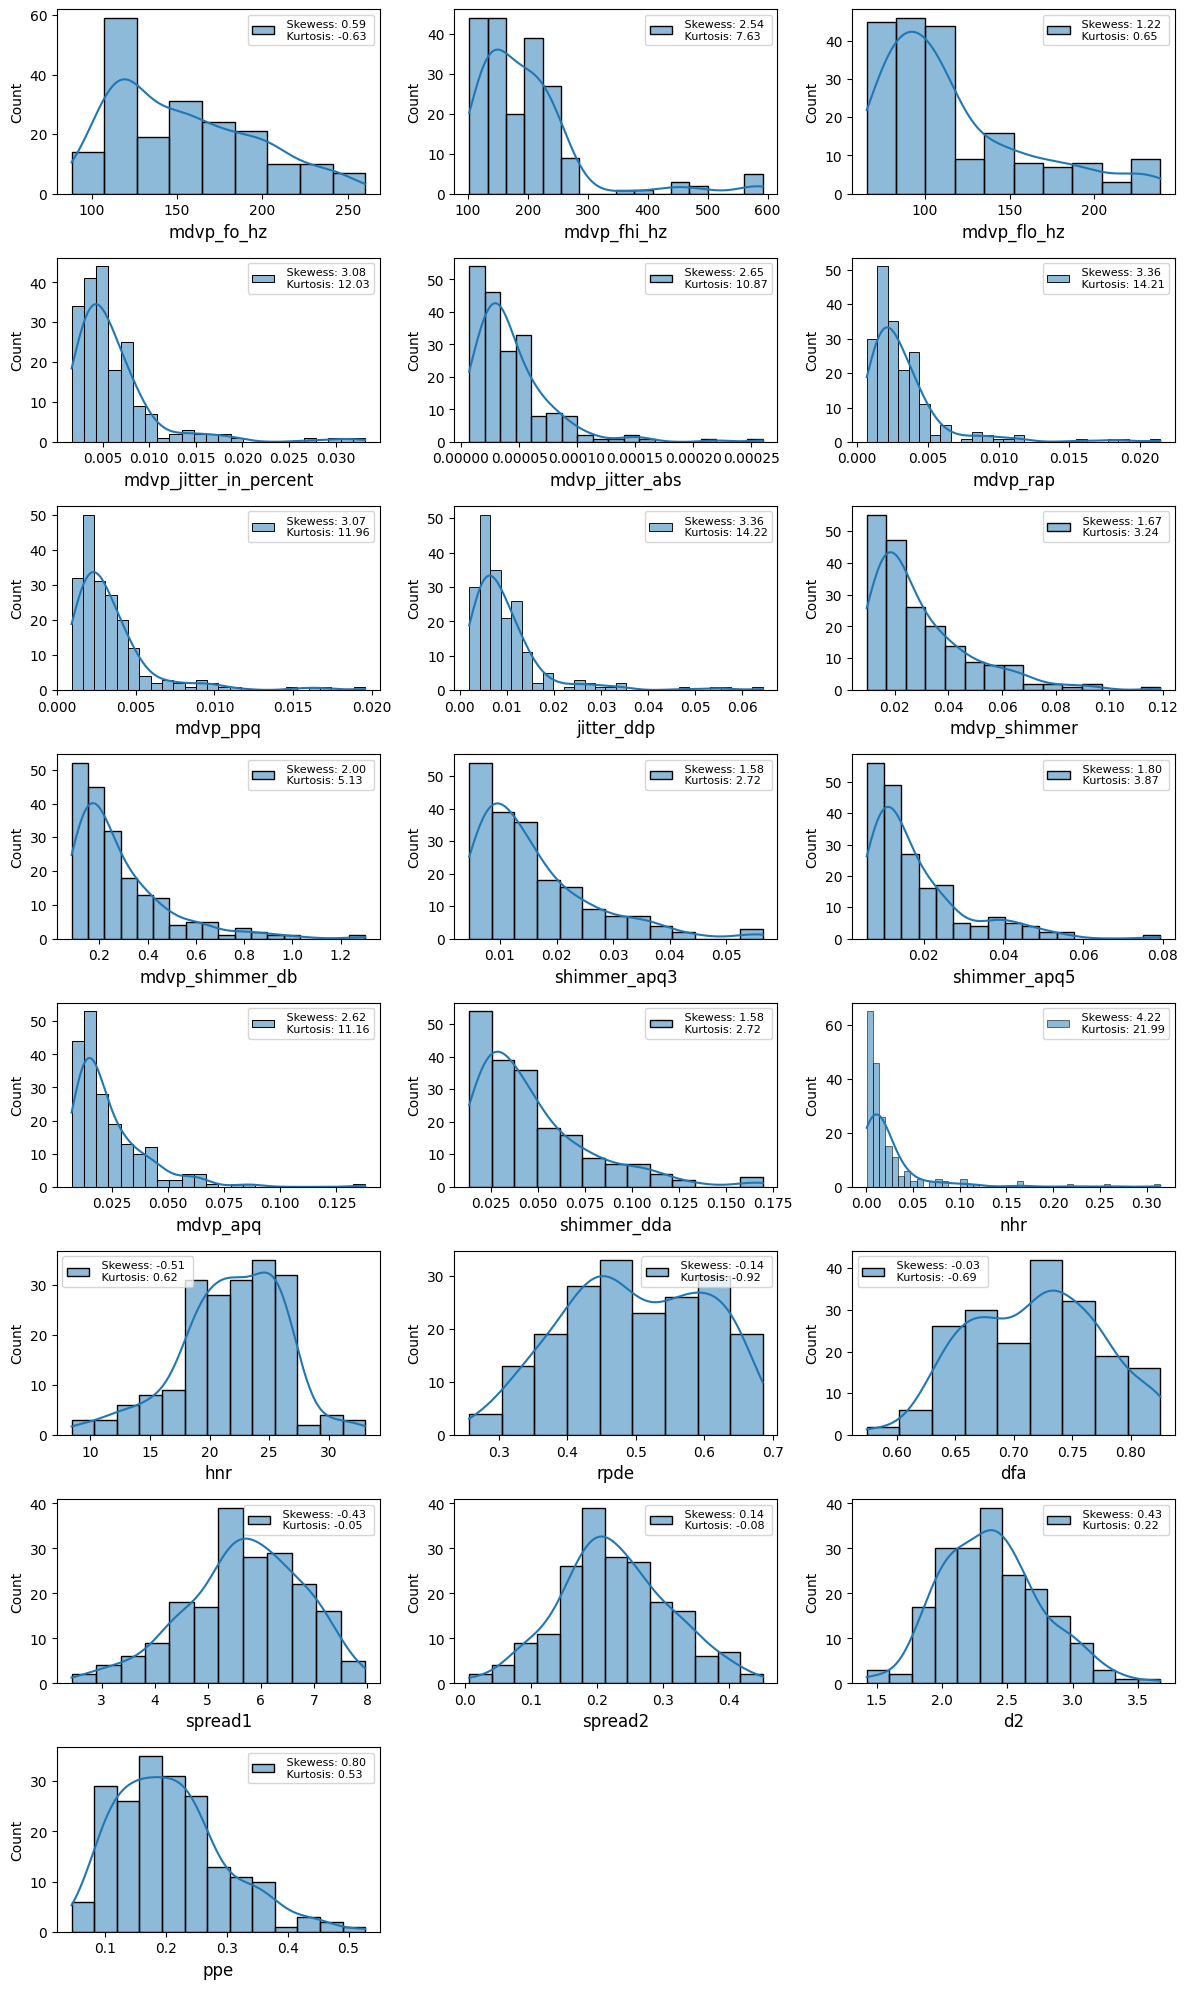

In [16]:
# Define the size of the grid and each figure, in this case, is 8 x 3 and 12 x 20, respectively
grid_size = (8,3)
fig = plt.figure(figsize = (12, 20))
# Plotting the PDF of each variable
for i, column_name in enumerate(column_names):
  metrics = data_comparison.iloc[i].tolist()
  fig.add_subplot(grid_size[0], grid_size[1], i + 1)
  plot = sns.histplot(data[column_name], kde = True,label=' Skewess: {1:.2f} \n Kurtosis: {2:.2f}'.format(*metrics))
  plot.legend(fontsize="8", loc ="best")
  plot.set_xlabel(column_name, fontsize = 12)
plt.tight_layout()
# Save image
#plt.savefig('pdf_distribution.png', bbox_inches='tight')

We observe that most of the variables appear to be normally distributed and are skewed to the left.

*Now, we plotted the distribution of each variable concerning the patient's diagnosis.*

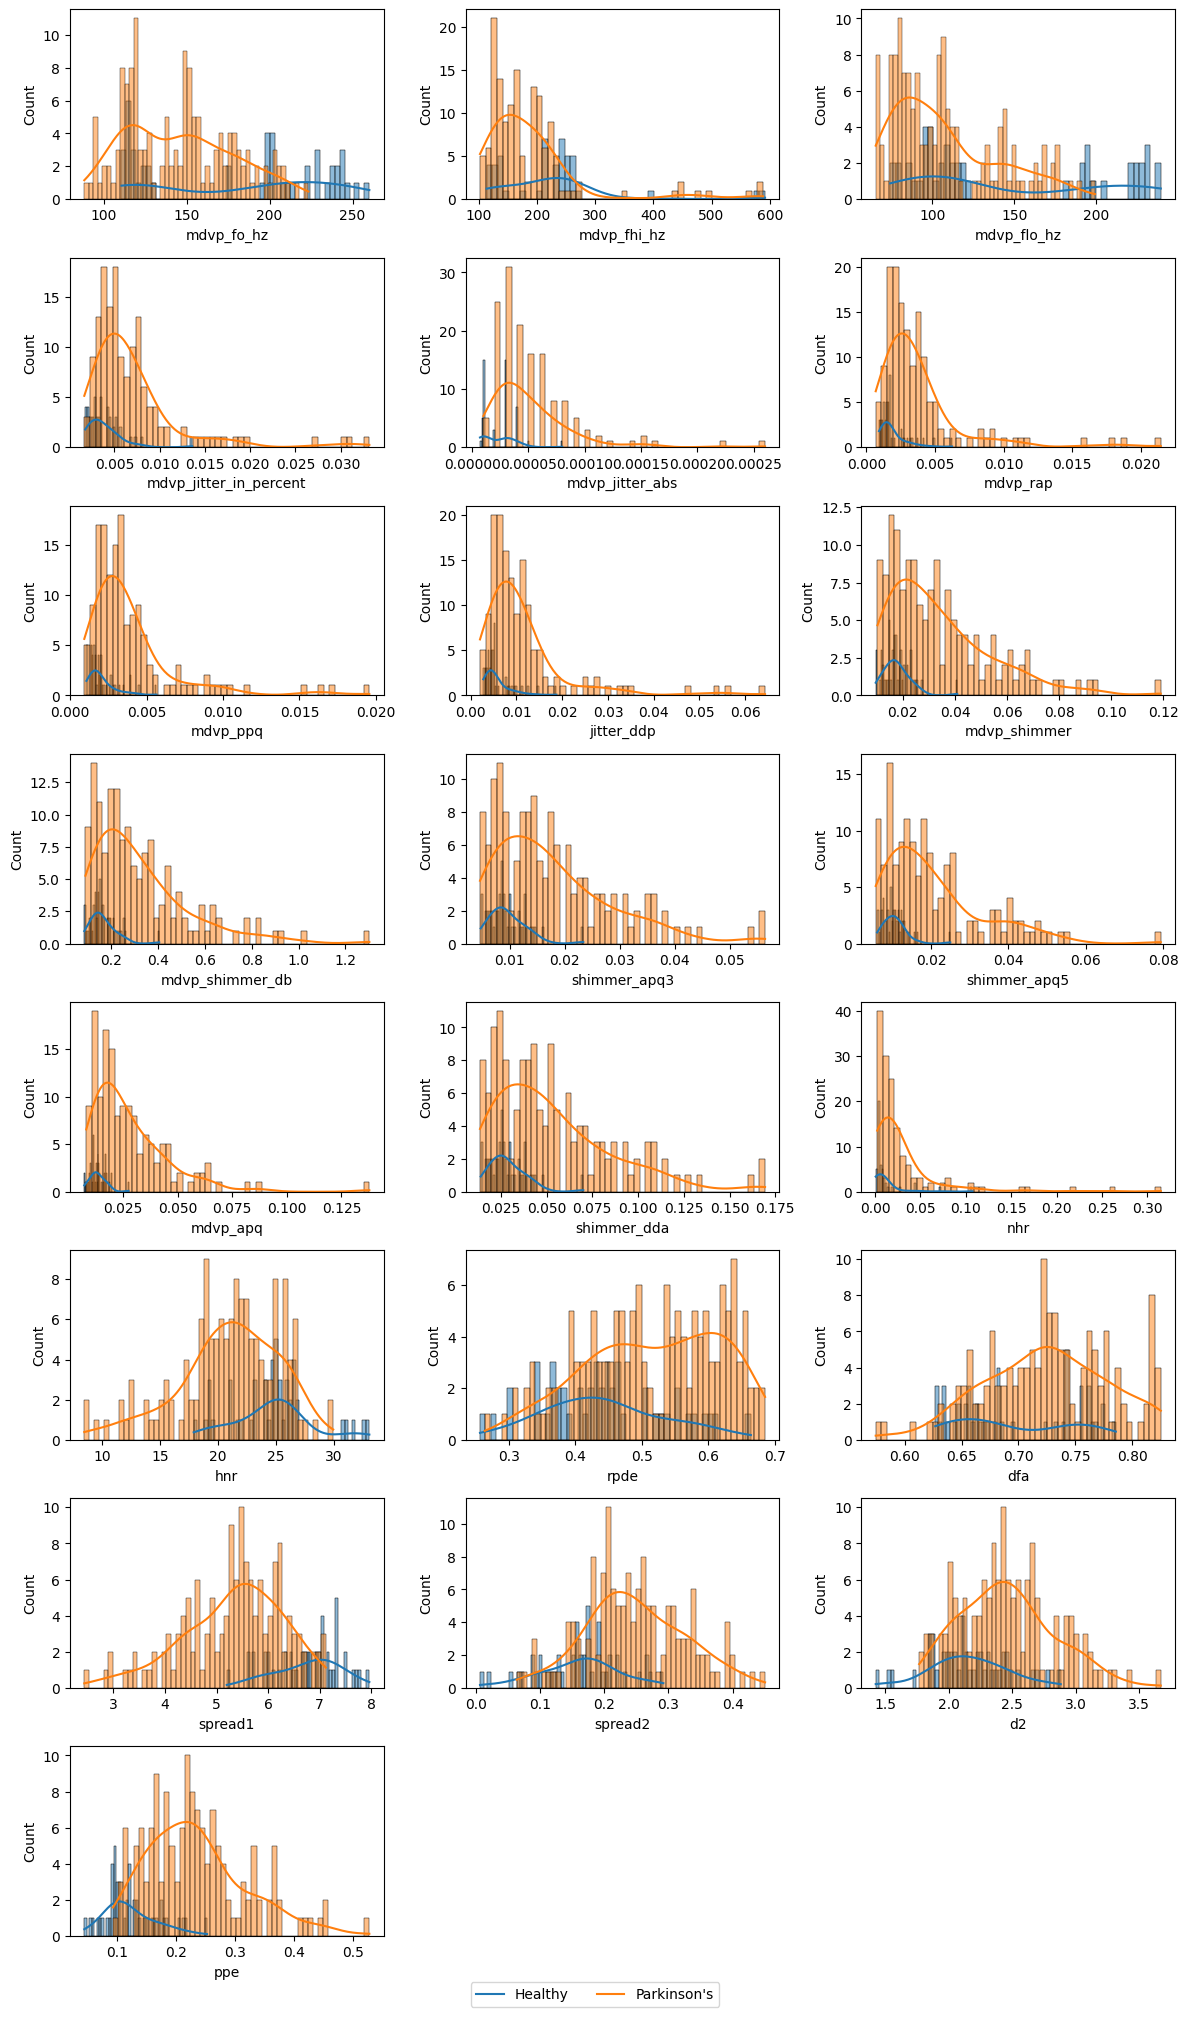

In [17]:
# Define the size of the grid and each figure, in this case, is 8 x 3 and 12 x 20, respectively
grid_size = (8,3)
fig = plt.figure(figsize = (12, 20))
# Plotting the PDF of each variable
for i, column_name in enumerate(column_names):
  fig.add_subplot(grid_size[0], grid_size[1], i + 1)
  # seaborn histplot to examine distribution of the Variable of Healthy patient
  sns.histplot(data[data['status'] == 0][column_name], bins=50, kde=True)
  # seaborn histplot to examine distribution of the Variable of Parkinson's patient
  sns.histplot(data[data['status'] == 1][column_name], bins=50, kde=True)
Legends = ['Healthy', 'Parkinson\'s']
fig.legend(Legends, loc='center', ncol=len(Legends), bbox_to_anchor=(0.5,0), bbox_transform=fig.transFigure)
plt.tight_layout()
#plt.savefig('distribution_by_status.png', bbox_inches='tight') ## bbox_to_anchor=(0.5,0.85) to save

We observed that the distributions studied, when differentiating between healthy people and people with Parkinson's, seem to be very similar or present small differences. We hope that these small differences will be enough to distinguish between healthy people and those with Parkinson's.

*To examine outliers for each variable, we used seaborn boxplot.*

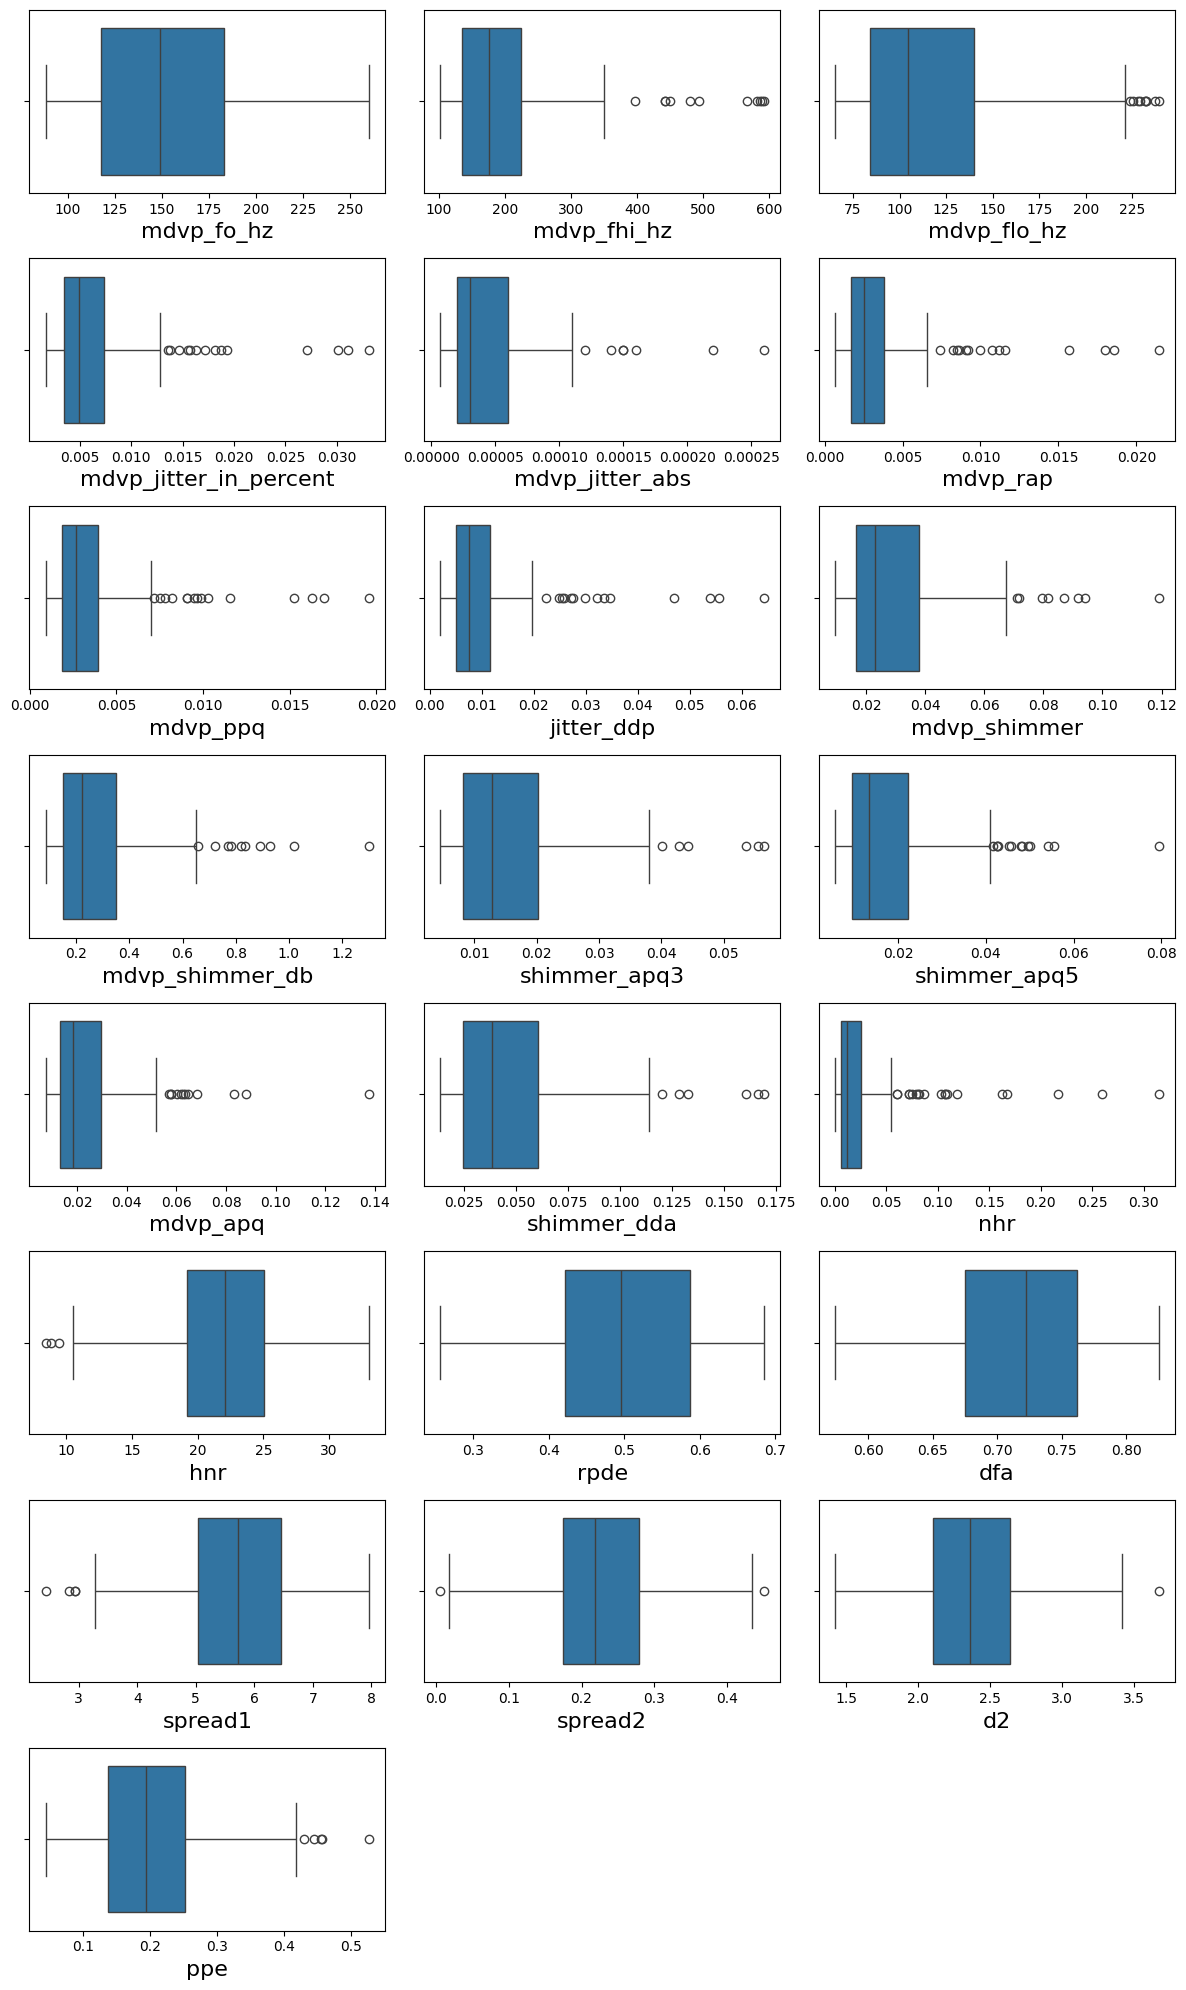

In [18]:
# Define the size of the grid and each figure, in this case, is 8 x 3 and 12 x 20, respectively
grid_size = (8,3)
fig = plt.figure(figsize = (12, 20))
# Plotting the PDF of each variable
for i, column_name in enumerate(column_names):
  fig.add_subplot(grid_size[0], grid_size[1], i + 1)
  plot = sns.boxplot(x=data[column_name])
  plot.set_xlabel(column_name, fontsize = 16)
plt.tight_layout()

The box-and-whisker plots of the variables of interest indicate that outliers are common, suggesting the need to use models capable of handling these points. Furthermore, the predominance of normally distributed variables can be seen, with a bias to the left.

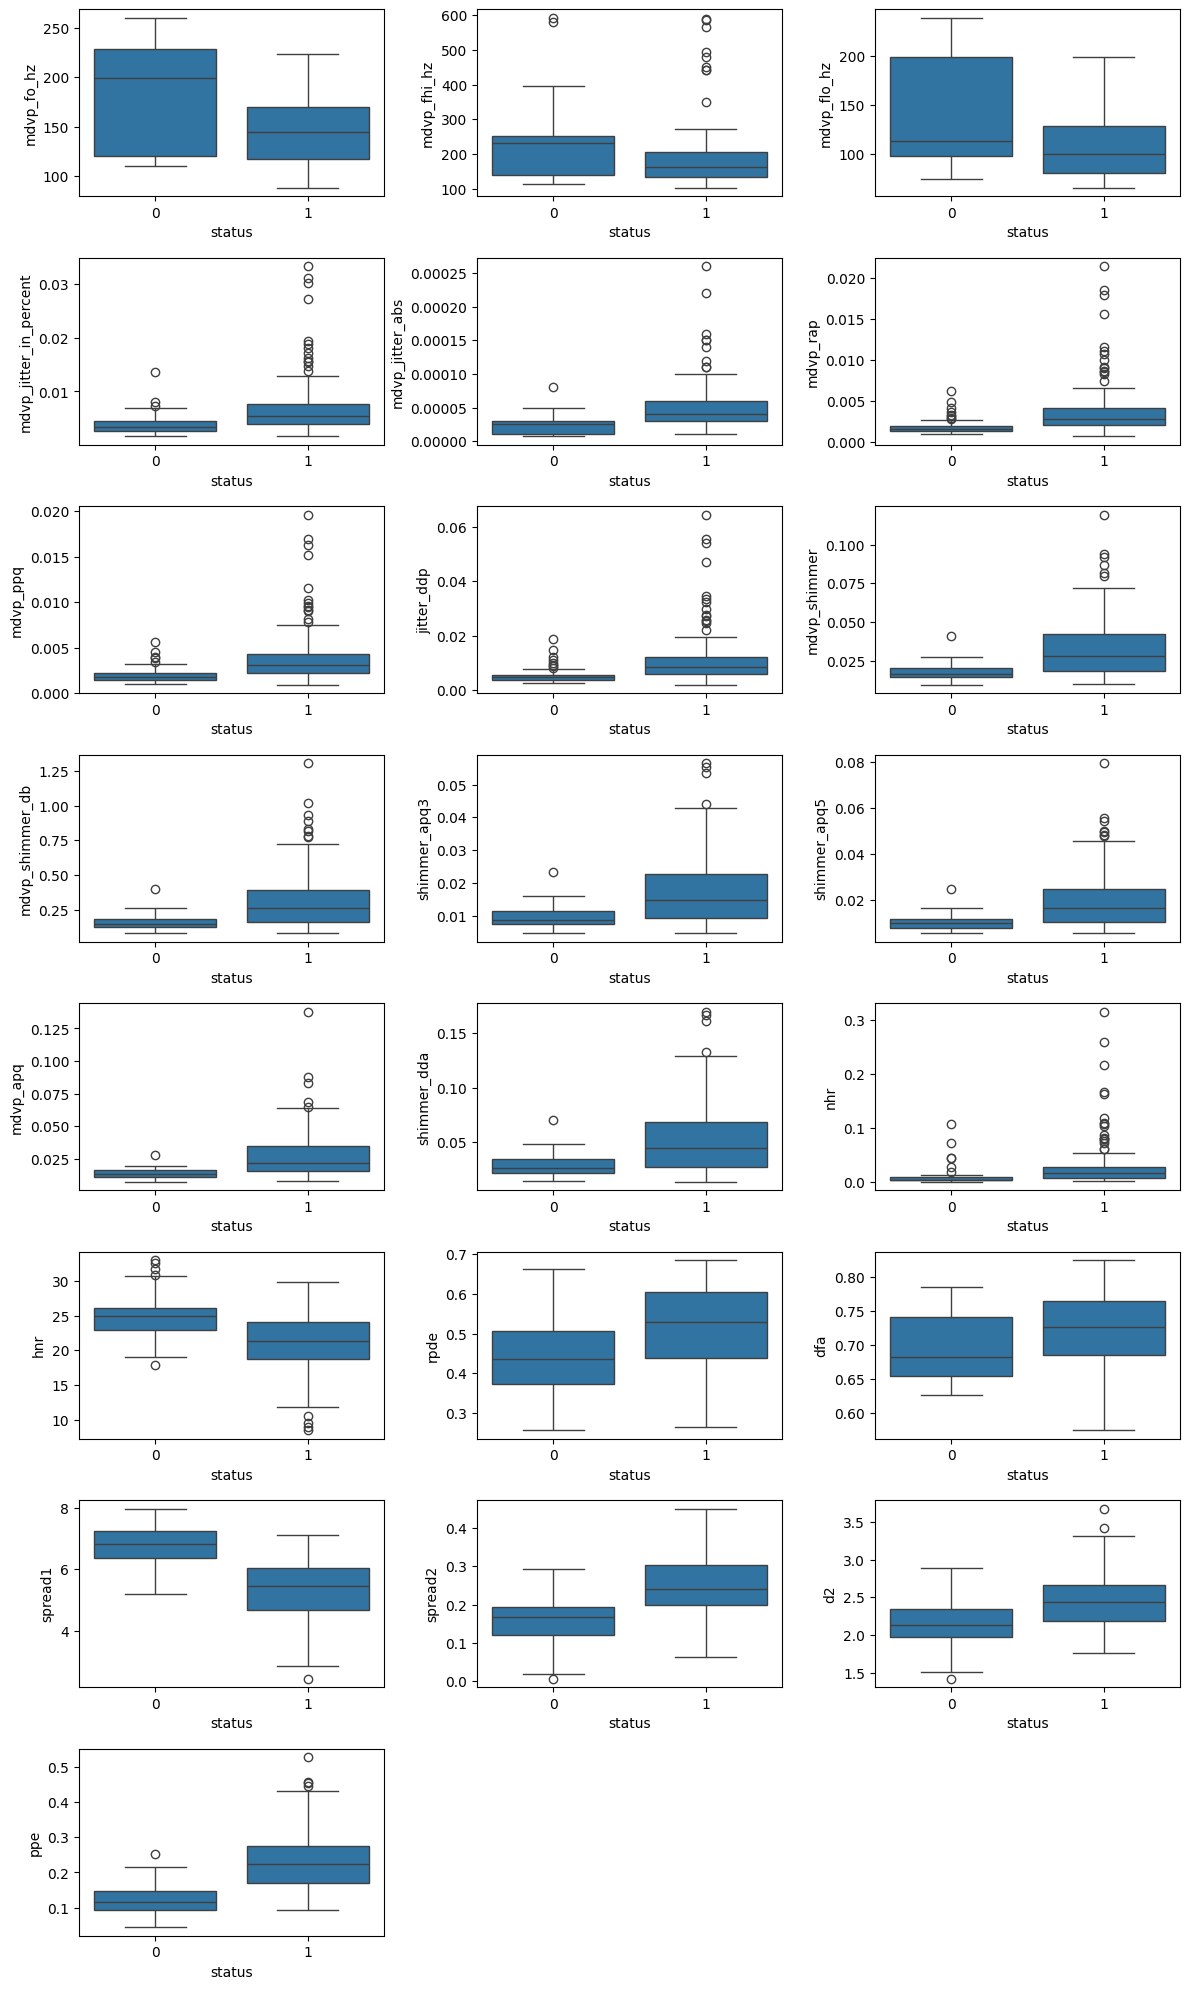

In [19]:
# Define the size of the grid and each figure, in this case, is 8 x 3 and 12 x 20, respectively
grid_size = (8,3)
fig = plt.figure(figsize = (12, 20))
# Plotting the PDF of each variable
for i, column_name in enumerate(column_names):
  fig.add_subplot(grid_size[0], grid_size[1], i + 1)
  plot = sns.boxplot(x=data['status'],y=data[column_name])
plt.tight_layout()
#plt.savefig('box_by_status.png', bbox_inches='tight')

Box-and-whisker plots of the variables of interest differentiating between healthy people and people with Parkinson's, indicate that most outliers are found in the data labeled Parkinson's. Accordingly, data with this label show greater variance and, on average, have higher values ​​than healthy people.

*We divided each variable into percentage segments to determine its impact on the presence of Parkinson's disease.*

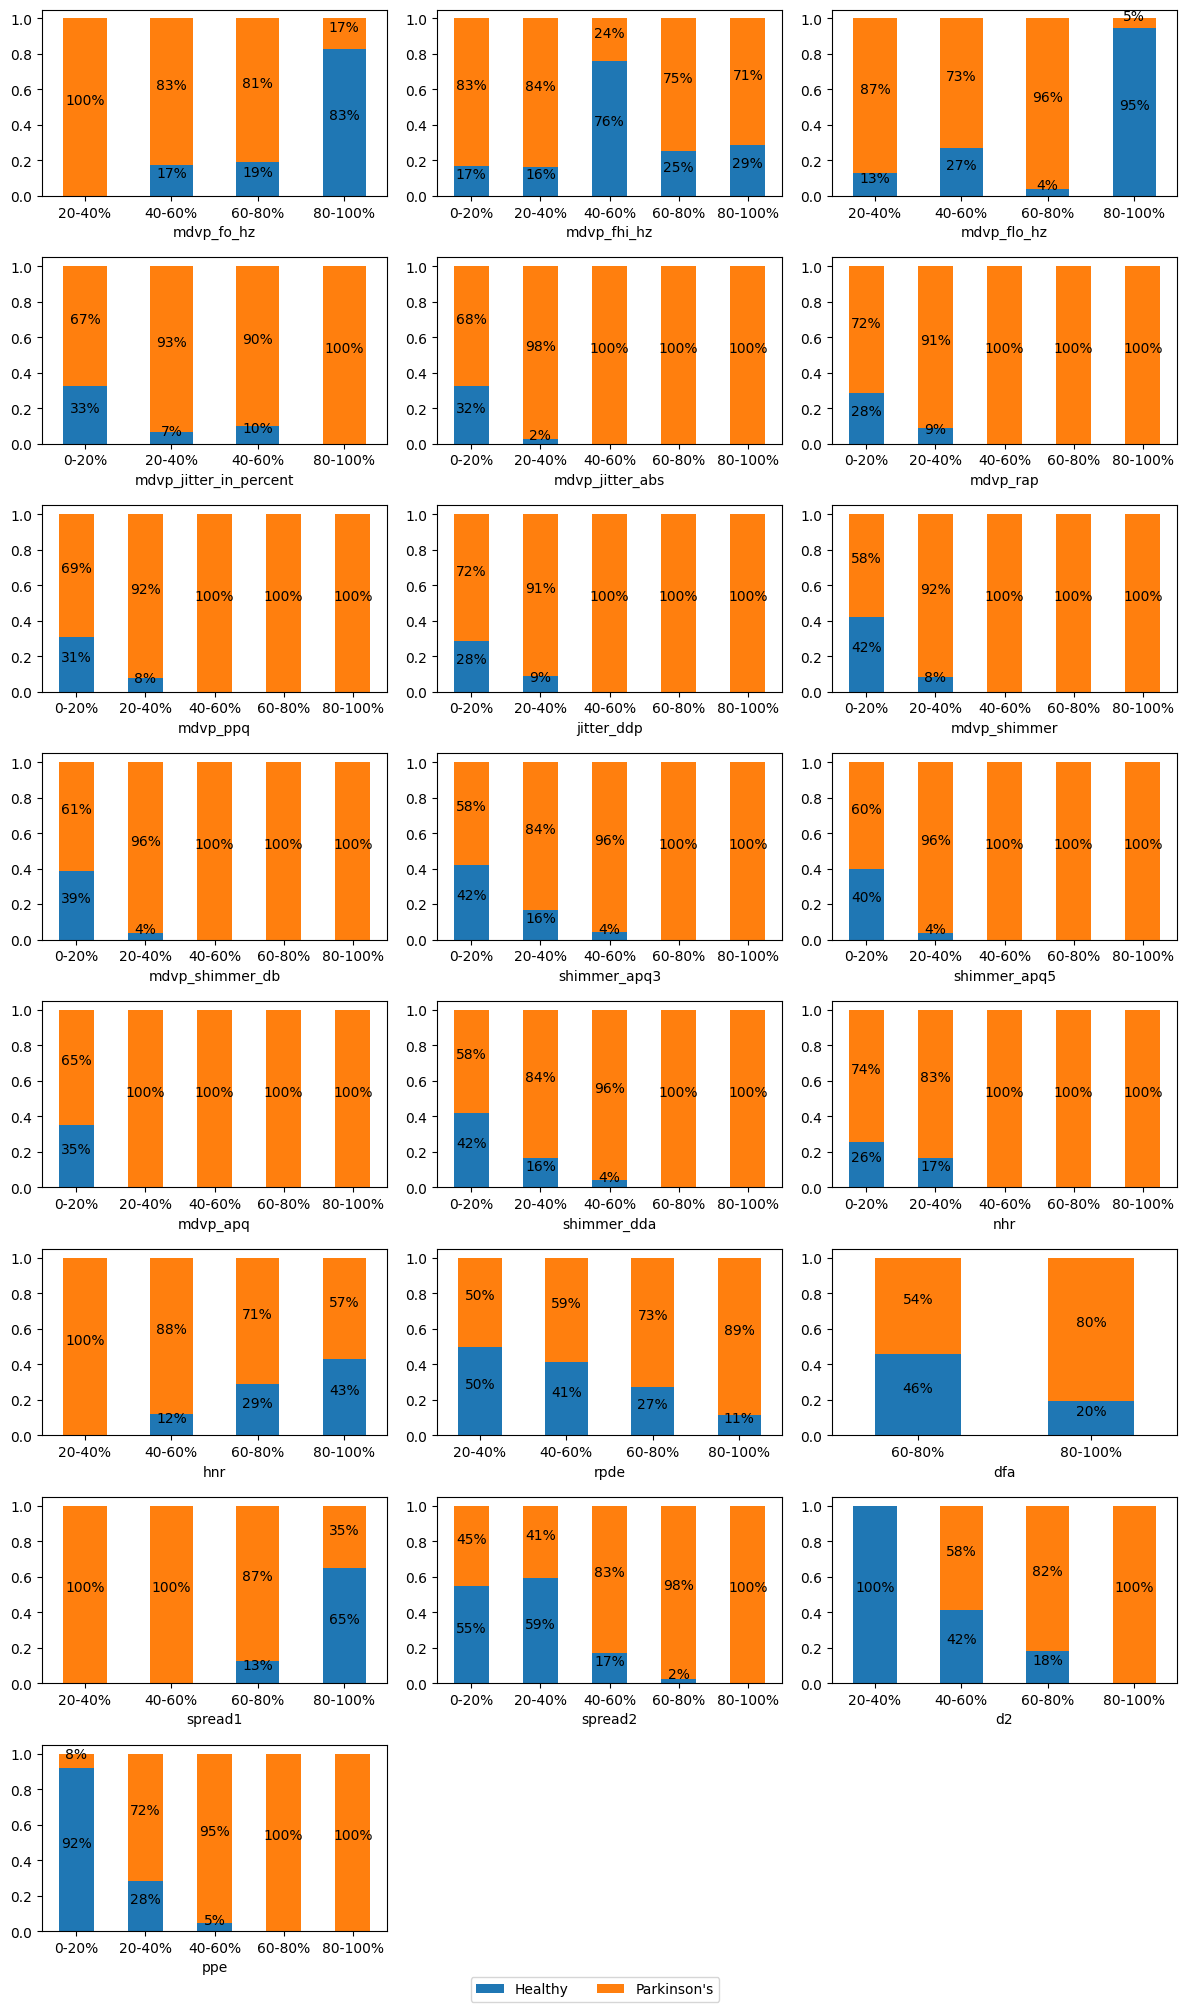

In [20]:
# Define the size of the grid and each figure, in this case, is 8 x 3 and 12 x 20, respectively
grid_size = (8,3)
fig = plt.figure(figsize = (12, 20))
# Defining labels for each segment
column_name_group = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
for i, column_name in enumerate(column_names):
  n=data[column_name].max()/5
  bins = [0,n,2*n,3*n,4*n,5*n]
  ax = fig.add_subplot(grid_size[0], grid_size[1], i + 1)
  pdData_bin = pd.cut(pd.Series(data[column_name]),bins,labels=column_name_group)
  group_col = pd.crosstab(pdData_bin,data.status).apply(lambda r: r/r.sum()*100, axis=1)
  ax_1 = group_col.div(group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, ax=ax, legend=False, rot=0)
  ##### Adding labels to each bar
  for rec in ax_1.patches:
    height = rec.get_height()
    if height > 0:
      ax_1.text(rec.get_x() + rec.get_width() / 2,
                rec.get_y() + height / 2,
                "{:.0f}%".format(height*100),
                ha='center',
                va='bottom')
  #####
  plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=1, wspace=0.3)
# Adding a general legend
Legends = ['Healthy', 'Parkinson\'s']
fig.legend(Legends, loc='center', ncol=len(Legends), bbox_to_anchor=(0.5,0), bbox_transform=fig.transFigure)
plt.tight_layout()
#plt.savefig('segmentation.png', bbox_inches='tight')

In the previous graphs, you can observe that as the variables *MDVP_F0_Hz* and *MDVP_Flo_Hz* increase, the probability of having Parkinson's decreases drastically.

In [21]:
# Counting the occurrences of each unique value in the "status" column of the DataFrame data
data["status"].value_counts()

status
1    147
0     48
Name: count, dtype: int64

*Distribution of data according to patient status*

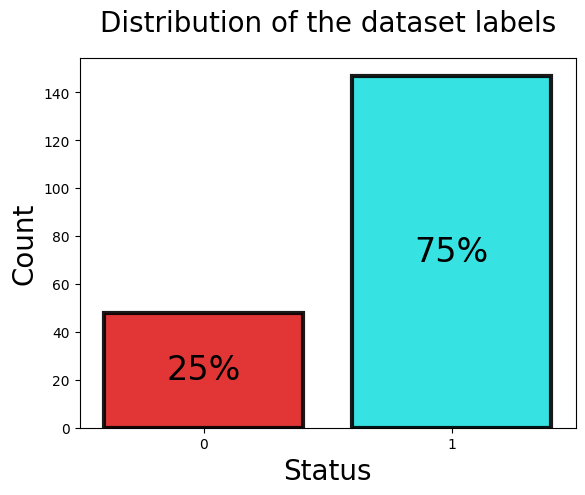

In [22]:
fig = sns.countplot(data, x='status', hue = 'status',palette=['red', 'cyan'], edgecolor='black', linewidth=3, alpha=0.9, legend = False)

total = len(data['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)

fig.set_xlabel('Status', fontsize=20)
fig.set_ylabel('Count', fontsize=20)

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20)
plt.show()

The graph above indicates that 25% of the data corresponds to people with Parkinson's, while 75% corresponds to people without the disease. This shows that the database is imbalanced, suggesting the need to consider techniques to balance the situation, such as SMOTE (Synthetic Minority Over-sampling Technique). Using techniques like SMOTE can help improve the accuracy of predictive models by generating synthetic data for the minority class, thereby reducing bias toward the majority class and allowing for better generalization and model performance in identifying people with Parkinson's.

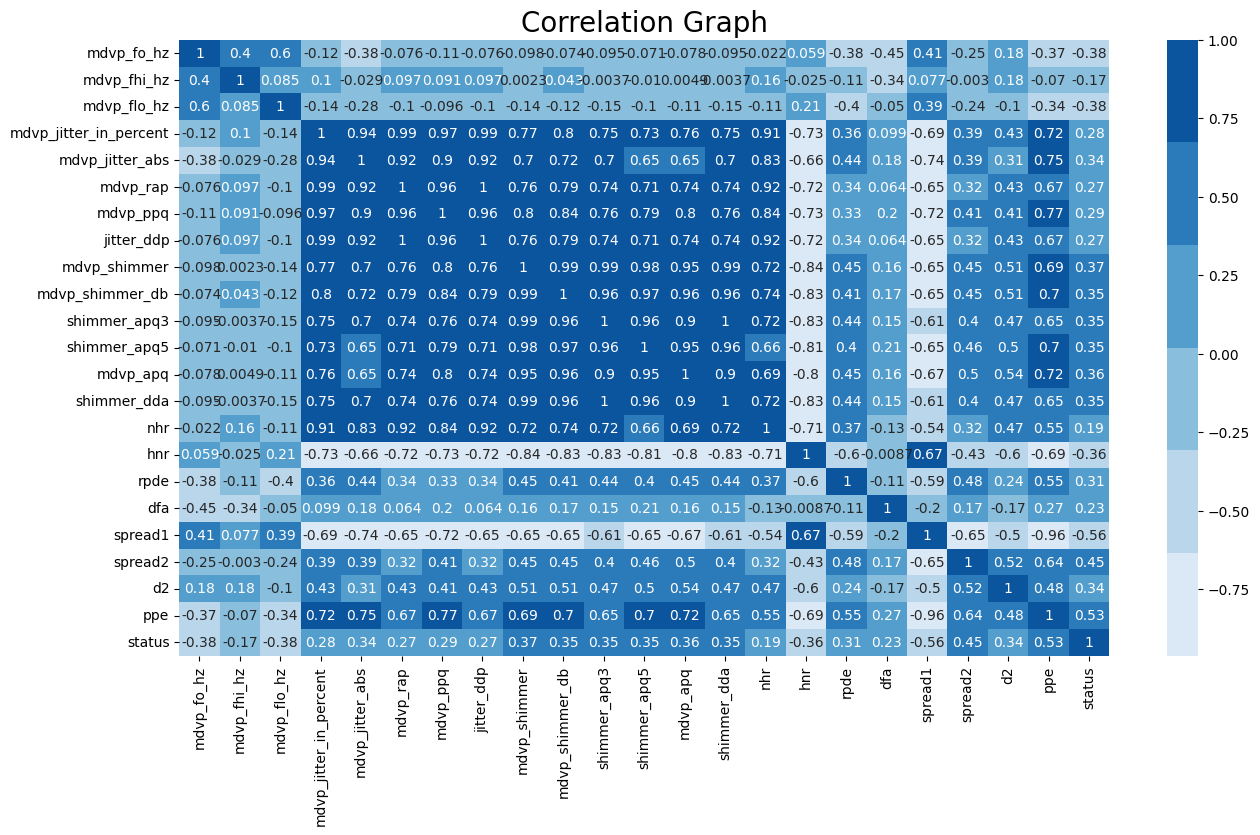

In [23]:
# Correlation between the variables
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(data.corr(numeric_only = True), annot=True, cmap=cmap)
#plt.savefig('correlation.png', bbox_inches='tight')
plt.show()

## Modeling

*Now, we split our dataset between the test and the train sets.*

In [24]:
# Define the features (X) and the output labels (y)
X=data.drop(['name','status'],axis=1)
y=data["status"]

# Split the variables with an 80-20 split and some random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Normalization: Since the PDFs of our variables are not normal, we opted to normalized our data using the object* `MinMaxScaler()`

In [25]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

*Following we create a function that will allow us to briefly evaluate the performance of the various models.*

In [26]:
# We define the metrics to evaluate our models
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(" • Cross Validation Score : ", round(model_score * 100,2))
    print(f" \033[1m❖ Testing Accuracy Score : \033[1m{round(accuracy_score(Ytest, Ypredicted) * 100,2)}\033[0m\033[0m")
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print(' • AUC-ROC Score is :', round(roc_auc_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20)
    plt.ylabel('True Labels', labelpad=25, fontsize=20)
    #plt.savefig('confusion_matrix.png', bbox_inches='tight')
    plt.show()

The confusion matrix is ​​a tool used in the evaluation of classification models to measure their performance. It consists of a table that summarizes the model predictions compared to the actual values, dividing the results into four categories: true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). True positives are cases where the model correctly predicted the positive class, and true negatives are cases where it correctly predicted the negative class. False positives occur when the model wrongly predicts the positive class, and false negatives when it wrongly predicts the negative class. This matrix allows you to calculate key metrics such as precision, sensitivity (recall), specificity, and F1 value, providing a comprehensive view of the model's performance in data classification.

In [27]:
from tabulate import tabulate
table = [
    ["True Labels / Predicted Labels", "Positive (1)", "Negative (0)"],
    ["Positive (1)", "TP", "FP"],
    ["Negative (0)", "FN", "TN"]
]
print(tabulate(table, headers='firstrow'))

True Labels / Predicted Labels    Positive (1)    Negative (0)
--------------------------------  --------------  --------------
Positive (1)                      TP              FP
Negative (0)                      FN              TN


### Logistic Regression

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score :  83.87
 ❖ Testing Accuracy Score : 89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
 • AUC-ROC Score is : 71.43
--------------------------------------------------------------------------------


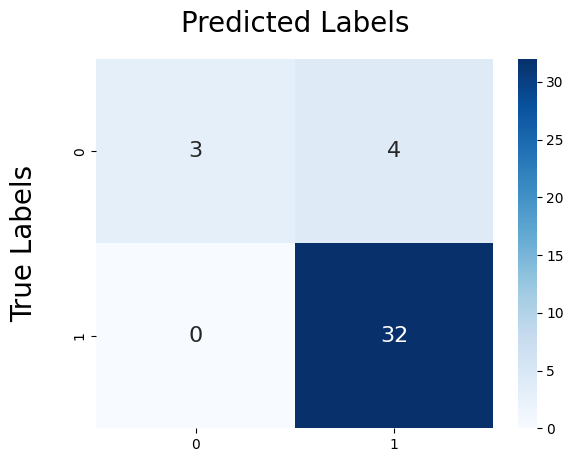

In [28]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

### Support Vector Machine

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score :  87.67
 ❖ Testing Accuracy Score : 89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
 • AUC-ROC Score is : 71.43
--------------------------------------------------------------------------------


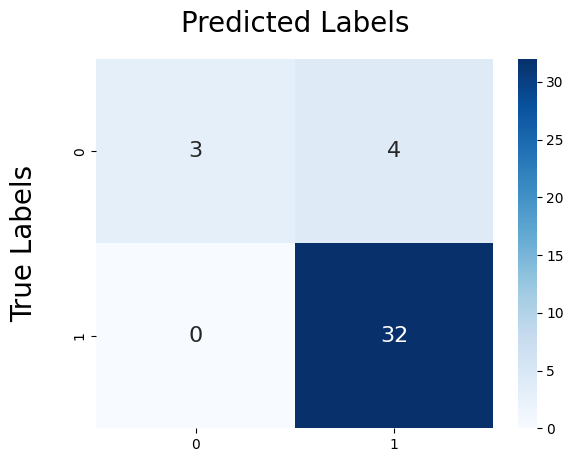

In [29]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree Classifier

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score :  87.79
 ❖ Testing Accuracy Score : 92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
 • AUC-ROC Score is : 84.15
--------------------------------------------------------------------------------


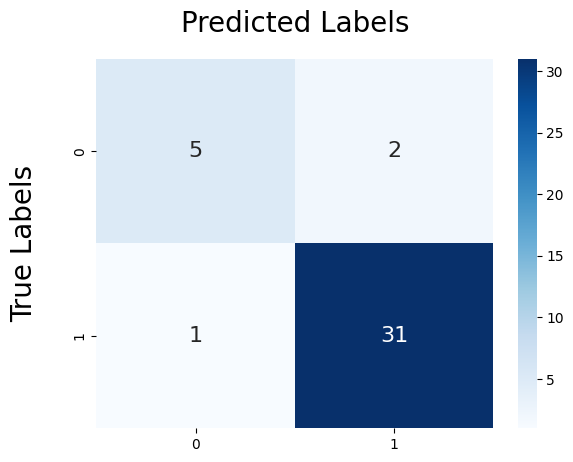

In [30]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)

### Random Forest Classifier

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score :  90.29
 ❖ Testing Accuracy Score : 94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
 • AUC-ROC Score is : 85.71
--------------------------------------------------------------------------------


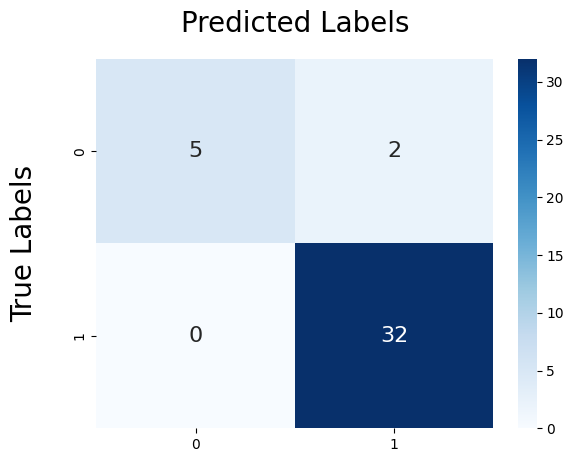

In [31]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

### K-Neighbors Classifier

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score :  89.79
 ❖ Testing Accuracy Score : 94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
 • AUC-ROC Score is : 85.71
--------------------------------------------------------------------------------


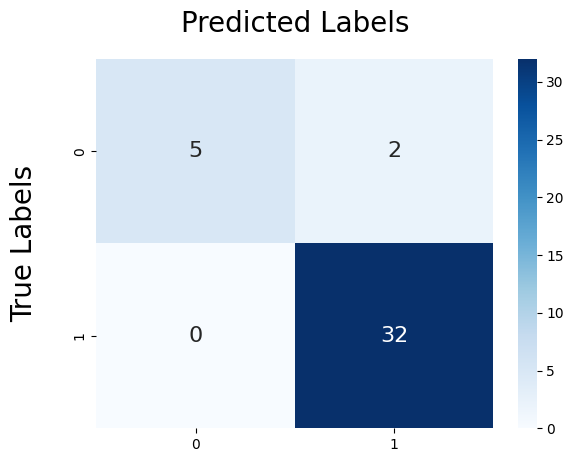

In [32]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

### Extreme Gradient Boosting Classifier

--------------------------------------------------------------------------------
Extreme Gradient Boosting Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score :  92.29
 ❖ Testing Accuracy Score : 94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
 • AUC-ROC Score is : 85.71
--------------------------------------------------------------------------------


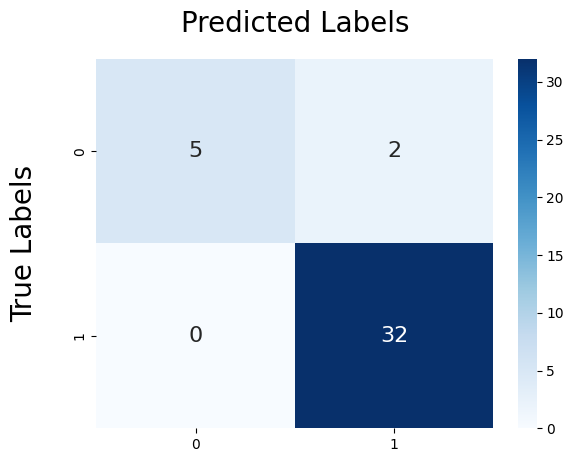

In [33]:
XGBC = XGBClassifier()
XGBC.fit(X_train_scaled, y_train)
y_pred_XGBC = XGBC.predict(X_test_scaled)
print('-'*80)
print("Extreme Gradient Boosting Classifier :")
print("-"*16)
Evaluate_Performance(XGBC, X_train_scaled, X_test_scaled, y_train, y_test)

## Comparison of the models

In [34]:
# Creating a list to save the models and them predictions values
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN),
    ('Extreme Gradient Boosting Classifier', y_pred_XGBC)
]

In [35]:
# Creating an empty list to save the metrics of the models
results = []
# Computing the metrics for each model and saving in the list 'results'
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    AUCROC = roc_auc_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'AUC-ROC': AUCROC
    })

In [36]:
# Creating a data frame with these results
results_data = pd.DataFrame(results)
# Set the Model column as the index
results_data.set_index('Model', inplace=True)
results_data

,Precision,Recall,F1-Score,Accuracy,AUC-ROC
Model,,,,,
Logistic Regression,0.888889,1.00000,0.941176,0.897436,0.714286
Support Vector Machine,0.888889,1.00000,0.941176,0.897436,0.714286
Decision Tree,0.939394,0.96875,0.953846,0.923077,0.841518
Random Forest,0.939394,0.96875,0.953846,0.923077,0.841518
K-Nearest Neighbor,0.941176,1.00000,0.969697,0.948718,0.857143
Extreme Gradient Boosting Classifier,0.941176,1.00000,0.969697,0.948718,0.857143


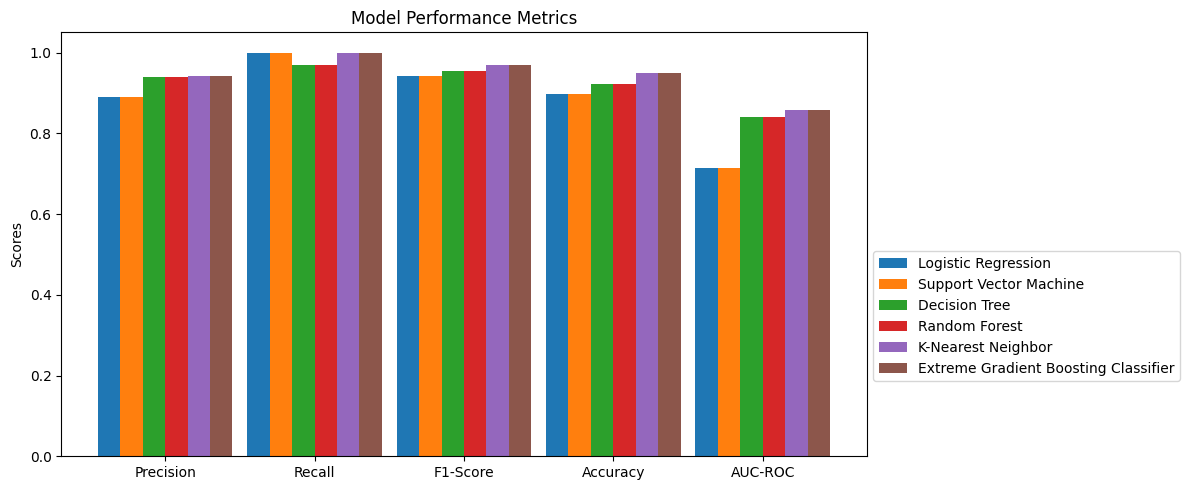

In [49]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_data.index):
    values = results_data.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_data) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend(bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('performance_metrics.png', bbox_inches='tight')
plt.show()

Observe that models *Random Forest*, *K-Nearest Neighbor* and *Extreme Gradient Boosting Classifier* are the best overall performers, while *Logistic Regression* has a rather precarious accuracy compared to the rest of the models.